Integrantes

Grecia Abigaíl Martínez Ambríz 1805217

Luis Aldair Hernández Martínez 1616940

Continuacion del punto 6 

In [1]:
#empezamos importando las librerias
import numpy as np
import pandas as pd 
import scipy.stats as stats
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA

%matplotlib inline


In [2]:
#fijamos tamaño de graficas
plt.rcParams['figure.figsize'] = [10, 7.5]

In [3]:
#eliminamos las advertencias
import warnings
warnings.filterwarnings("ignore")

In [4]:
IGAE = pd.read_csv('https://raw.githubusercontent.com/alda1rx/bases/main/igae.csv')

In [5]:
IGAE = IGAE.drop(['Periodos'], axis=1)

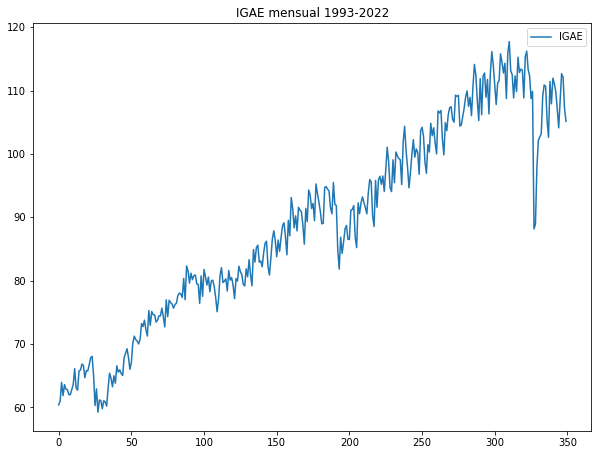

In [6]:
IGAE.plot()
plt.title('IGAE mensual 1993-2022')
plt.show()


In [7]:
#8.- Realizamos la prueba de Raíces Unitarias (ADF)
result_adf = adfuller(IGAE['IGAE'])
if result_adf[1] < 0.05:
    
    print(f'con un un p-value={result_adf[1].round(3)}\n Se rechaza hipótesis nula, serie estacionaria') 
    
else:
    
    print(f'con un un p-value = {result_adf[1].round(3)}\n NO se rechaza hipótesis nula, serie no estacionaria')

con un un p-value = 0.753
 NO se rechaza hipótesis nula, serie no estacionaria


<AxesSubplot:>

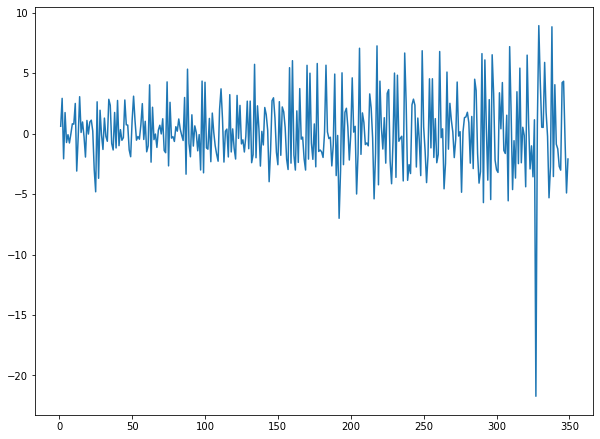

In [8]:
IGAE_DIFF = IGAE['IGAE'] - IGAE['IGAE'].shift()
IGAE_DIFF.plot()

In [9]:
#eliminamos los Nan
IGAE_DIFF = IGAE_DIFF.dropna()

In [10]:
IGAE_DIFF = IGAE_DIFF.reset_index()
IGAE_DIFF = IGAE_DIFF.drop(['index'], axis=1)
IGAE_DIFF

,IGAE
0,0.614830
1,2.920728
2,-2.077265
3,1.746916
4,-0.730312
...,...
344,4.224234
345,4.336268
346,-0.542462
347,-4.902903


In [11]:
#Realizamos la prueba de Raíces Unitarias (ADF)
result_adf = adfuller(IGAE_DIFF)
if result_adf[1] < 0.05:
    
    print(f'con un un p-value={result_adf[1].round(3)}\n Se rechaza hipótesis nula, serie estacionaria') 
    
else:
    
    print(f'con un un p-value = {result_adf[1].round(3)}\n NO se rechaza hipótesis nula, serie no estacionaria') 

con un un p-value=0.0
 Se rechaza hipótesis nula, serie estacionaria


La prueba ADF nos dice que nuestra serie ya es estacionaria y a la vez con esto obtenemos su grado de integración, el cual es 1, ya que ocupamos diferenciarla solo una vez para volverla estacionaria.

#### 9.- Una vez ya estacionario, realizamos las graficas ACF y PACF

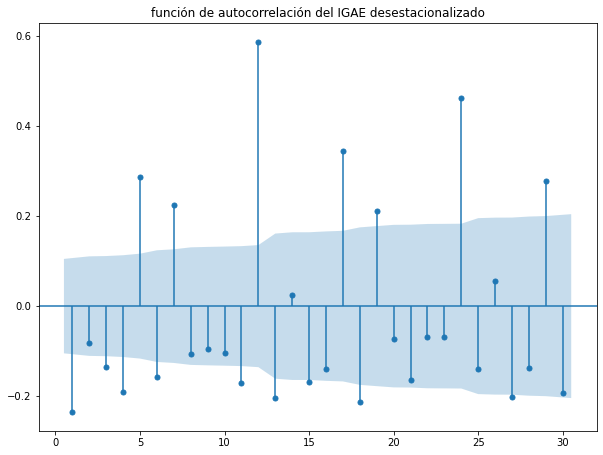

In [12]:
#grafica de autocorrelación ACF
plot_acf(IGAE_DIFF, zero=False, lags=30)
plt.title('función de autocorrelación del IGAE desestacionalizado')
plt.show()


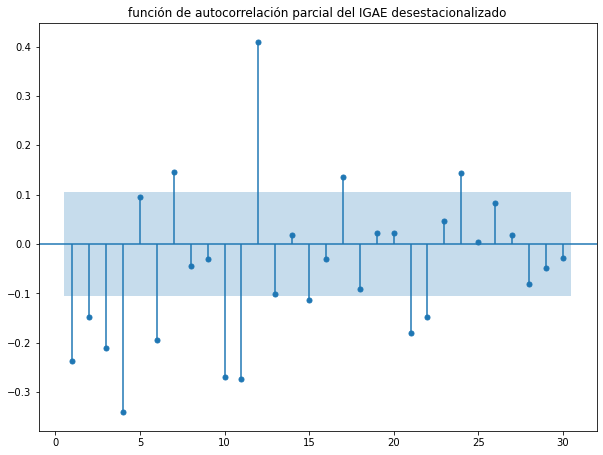

In [13]:
#grafica de autocorrelación parcial PACF
plot_pacf(IGAE_DIFF, zero=False, lags=30)
plt.title('función de autocorrelación parcial del IGAE desestacionalizado')
plt.show()

Los rezagos indican apróximadamente un ARMA(6,6), por lo cual procedemos a generarlo


In [15]:
# estimamos un ARIMA (2,1,6)
modelo = ARIMA(IGAE, order=(2, 0, 2))
resultado = modelo.fit()
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   IGAE   No. Observations:                  350
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -864.327
Date:                Tue, 24 May 2022   AIC                           1740.655
Time:                        10:25:00   BIC                           1763.802
Sample:                             0   HQIC                          1749.868
                                - 350                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         85.6939     16.203      5.289      0.000      53.936     117.452
ar.L1          0.4448      0.110      4.057      0.000       0.230       0.660
ar.L2          0.5524      0.109      5.074      0.000       0.339       0.766
ma.L1          0.1621      0.102      1.593      0.111      -0.037       0.362
ma.L2         -0.4886      0.059     -8.245      0.000      -0.605      -0.372
sigma2         8.0729      0.329     24.527      0.000       7.428       8.718
===================================================================================
Ljung-Box (L1) (Q):                   0.59   Jarque-Bera (JB):              2273.14
Prob(Q):                              0.44   Prob(JB):                         0.00
Heteroskedasticity (H):               4.31   Skew:                            -1.57
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### 11.- 
Recordando que el analisis de graficas no es muy exacto,
generamos 7 posibles resultados y tomar el mas adecuado

In [18]:
ic = {}
for ar in range(7):
    for ma in range(7):
        print(f"AR: {ar}, MA: {ma}")
        modelo = ARIMA(IGAE_DIFF, order=(ar,0,ma))
        resultado = modelo.fit()
        ic[(ar, ma)] = [resultado.aic, resultado.bic]

ic = pd.DataFrame(ic, index=["AIC", "BIC"]).T
ic.index = ic.index.set_names(["AR", "MA"])
ic

AR: 0, MA: 0
AR: 0, MA: 1
AR: 0, MA: 2
AR: 0, MA: 3
AR: 0, MA: 4
AR: 0, MA: 5
AR: 0, MA: 6
AR: 1, MA: 0
AR: 1, MA: 1
AR: 1, MA: 2
AR: 1, MA: 3
AR: 1, MA: 4
AR: 1, MA: 5
AR: 1, MA: 6
AR: 2, MA: 0
AR: 2, MA: 1
AR: 2, MA: 2
AR: 2, MA: 3
AR: 2, MA: 4
AR: 2, MA: 5
AR: 2, MA: 6
AR: 3, MA: 0
AR: 3, MA: 1
AR: 3, MA: 2
AR: 3, MA: 3
AR: 3, MA: 4
AR: 3, MA: 5
AR: 3, MA: 6
AR: 4, MA: 0
AR: 4, MA: 1
AR: 4, MA: 2
AR: 4, MA: 3
AR: 4, MA: 4
AR: 4, MA: 5
AR: 4, MA: 6
AR: 5, MA: 0
AR: 5, MA: 1
AR: 5, MA: 2
AR: 5, MA: 3
AR: 5, MA: 4
AR: 5, MA: 5
AR: 5, MA: 6
AR: 6, MA: 0
AR: 6, MA: 1
AR: 6, MA: 2
AR: 6, MA: 3
AR: 6, MA: 4
AR: 6, MA: 5
AR: 6, MA: 6


AIC          BIC
AR MA                          
0  0   1775.504576  1783.214720
   1   1742.780525  1754.345741
   2   1720.889708  1736.309996
   3   1713.085386  1732.360745
   4   1714.897986  1738.028418
   5   1694.191667  1721.177170
   6   1688.798875  1719.639450
1  0   1757.553936  1769.119152
   1   1716.046520  1731.466808
   2   1717.778947  1737.054307
   3   1720.554878  1743.685309
   4   1701.073665  1728.059169
   5   1691.228653  1722.069229
   6   1688.138553  1722.834200
2  0   1751.783293  1767.203580
   1   1717.637704  1736.913064
   2   1714.734141  1737.864572
   3   1716.525993  1743.511497
   4   1692.108331  1722.948906
   5   1691.026439  1725.722086
   6   1690.805447  1729.356166
3  0   1737.876924  1757.152284
   1   1714.972397  1738.102829
   2   1716.174089  1743.159592
   3   1655.859657  1686.700232
   4   1686.676055  1721.371702
   5   1668.468125  1707.018845
   6   1670.186600  1712.592391
4  0   1697.209587  1720.340019
   1   1684.359652  1711.345155
   2   1685.276016  1716.116591
   3   1627.844902  1662.540549
   4   1621.248640  1659.799359
   5   1619.450076  1661.855867
   6   1582.095392  1628.356255
5  0   1696.085637  1723.071140
   1   1686.008041  1716.848616
   2   1678.784354  1713.480001
   3   1641.226412  1679.777132
   4   1631.793932  1674.199723
   5   1600.572398  1646.833261
   6   1593.919773  1644.035708
6  0   1685.448710  1716.289285
   1   1680.816135  1715.511782
   2   1682.953741  1721.504460
   3   1638.782099  1681.187890
   4   1594.699726  1640.960589
   5   1629.245388  1679.361323
   6   1604.794182  1658.765189

In [19]:
#ordenamos segun el BIC
ic.sort_values('BIC', ascending = True)

AIC          BIC
AR MA                          
4  6   1582.095392  1628.356255
6  4   1594.699726  1640.960589
5  6   1593.919773  1644.035708
   5   1600.572398  1646.833261
6  6   1604.794182  1658.765189
4  4   1621.248640  1659.799359
   5   1619.450076  1661.855867
   3   1627.844902  1662.540549
5  4   1631.793932  1674.199723
6  5   1629.245388  1679.361323
5  3   1641.226412  1679.777132
6  3   1638.782099  1681.187890
3  3   1655.859657  1686.700232
   5   1668.468125  1707.018845
4  1   1684.359652  1711.345155
3  6   1670.186600  1712.592391
5  2   1678.784354  1713.480001
6  1   1680.816135  1715.511782
4  2   1685.276016  1716.116591
6  0   1685.448710  1716.289285
5  1   1686.008041  1716.848616
0  6   1688.798875  1719.639450
4  0   1697.209587  1720.340019
0  5   1694.191667  1721.177170
3  4   1686.676055  1721.371702
6  2   1682.953741  1721.504460
1  5   1691.228653  1722.069229
   6   1688.138553  1722.834200
2  4   1692.108331  1722.948906
5  0   1696.085637  1723.071140
2  5   1691.026439  1725.722086
1  4   1701.073665  1728.059169
2  6   1690.805447  1729.356166
1  1   1716.046520  1731.466808
0  3   1713.085386  1732.360745
   2   1720.889708  1736.309996
2  1   1717.637704  1736.913064
1  2   1717.778947  1737.054307
2  2   1714.734141  1737.864572
0  4   1714.897986  1738.028418
3  1   1714.972397  1738.102829
   2   1716.174089  1743.159592
2  3   1716.525993  1743.511497
1  3   1720.554878  1743.685309
0  1   1742.780525  1754.345741
3  0   1737.876924  1757.152284
2  0   1751.783293  1767.203580
1  0   1757.553936  1769.119152
0  0   1775.504576  1783.214720

#### 12.- Segun el criterio BIC el mejor modelo a estimar es un ARMA(4,6)

In [20]:
#ordenamos por el AIC
ic.sort_values('AIC', ascending = True)

AIC          BIC
AR MA                          
4  6   1582.095392  1628.356255
5  6   1593.919773  1644.035708
6  4   1594.699726  1640.960589
5  5   1600.572398  1646.833261
6  6   1604.794182  1658.765189
4  5   1619.450076  1661.855867
   4   1621.248640  1659.799359
   3   1627.844902  1662.540549
6  5   1629.245388  1679.361323
5  4   1631.793932  1674.199723
6  3   1638.782099  1681.187890
5  3   1641.226412  1679.777132
3  3   1655.859657  1686.700232
   5   1668.468125  1707.018845
   6   1670.186600  1712.592391
5  2   1678.784354  1713.480001
6  1   1680.816135  1715.511782
   2   1682.953741  1721.504460
4  1   1684.359652  1711.345155
   2   1685.276016  1716.116591
6  0   1685.448710  1716.289285
5  1   1686.008041  1716.848616
3  4   1686.676055  1721.371702
1  6   1688.138553  1722.834200
0  6   1688.798875  1719.639450
2  6   1690.805447  1729.356166
   5   1691.026439  1725.722086
1  5   1691.228653  1722.069229
2  4   1692.108331  1722.948906
0  5   1694.191667  1721.177170
5  0   1696.085637  1723.071140
4  0   1697.209587  1720.340019
1  4   1701.073665  1728.059169
0  3   1713.085386  1732.360745
2  2   1714.734141  1737.864572
0  4   1714.897986  1738.028418
3  1   1714.972397  1738.102829
1  1   1716.046520  1731.466808
3  2   1716.174089  1743.159592
2  3   1716.525993  1743.511497
   1   1717.637704  1736.913064
1  2   1717.778947  1737.054307
   3   1720.554878  1743.685309
0  2   1720.889708  1736.309996
3  0   1737.876924  1757.152284
0  1   1742.780525  1754.345741
2  0   1751.783293  1767.203580
1  0   1757.553936  1769.119152
0  0   1775.504576  1783.214720

#### 13.- Segun el criterio AIC el mejor modelo a estimar es un ARMA(4,6)

### Generamos 3 modelos 

In [21]:
# estimamos un ARIMA (4,1,6)
modelo1 = ARIMA(IGAE, order=(4, 1, 6))
resultado1 = modelo1.fit()
resultado1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   IGAE   No. Observations:                  350
Model:                 ARIMA(4, 1, 6)   Log Likelihood                -782.746
Date:                Mon, 23 May 2022   AIC                           1587.492
Time:                        19:34:44   BIC                           1629.898
Sample:                             0   HQIC                          1604.373
                                - 350                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7286      0.009    -81.811      0.000      -0.746      -0.711
ar.L2         -0.2716      0.011    -25.662      0.000      -0.292      -0.251
ar.L3         -0.7315      0.008    -91.139      0.000      -0.747      -0.716
ar.L4         -0.9942      0.007   -133.122      0.000      -1.009      -0.980
ma.L1          0.5175      0.038     13.589      0.000       0.443       0.592
ma.L2         -0.1148      0.044     -2.622      0.009      -0.201      -0.029
ma.L3          0.4528      0.077      5.911      0.000       0.303       0.603
ma.L4          0.7446      0.051     14.663      0.000       0.645       0.844
ma.L5         -0.4061      0.056     -7.254      0.000      -0.516      -0.296
ma.L6         -0.2852      0.060     -4.784      0.000      -0.402      -0.168
sigma2         5.0200      0.300     16.709      0.000       4.431       5.609
===================================================================================
Ljung-Box (L1) (Q):                   0.25   Jarque-Bera (JB):              8666.00
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):               3.97   Skew:                            -2.64
Prob(H) (two-sided):                  0.00   Kurtosis:                        26.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Todas las variables y constantes son significativas 

In [22]:
# estimamos un ARIMA (6,1,4)
modelo2 = ARIMA(IGAE, order=(6, 1, 4))
resultado2 = modelo2.fit()
resultado2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   IGAE   No. Observations:                  350
Model:                 ARIMA(6, 1, 4)   Log Likelihood                -794.906
Date:                Mon, 23 May 2022   AIC                           1611.811
Time:                        19:35:12   BIC                           1654.217
Sample:                             0   HQIC                          1628.692
                                - 350                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8386      0.081    -10.328      0.000      -0.998      -0.679
ar.L2         -0.5961      0.054    -11.090      0.000      -0.701      -0.491
ar.L3         -0.9365      0.036    -25.998      0.000      -1.007      -0.866
ar.L4         -1.1259      0.058    -19.376      0.000      -1.240      -1.012
ar.L5         -0.3122      0.058     -5.428      0.000      -0.425      -0.199
ar.L6         -0.2261      0.047     -4.848      0.000      -0.317      -0.135
ma.L1          0.5693      0.116      4.922      0.000       0.343       0.796
ma.L2          0.2535      0.065      3.913      0.000       0.127       0.381
ma.L3          0.7612      0.141      5.411      0.000       0.486       1.037
ma.L4          0.8026      0.119      6.734      0.000       0.569       1.036
sigma2         5.3783      0.694      7.751      0.000       4.018       6.738
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6841.51
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               4.43   Skew:                            -2.18
Prob(H) (two-sided):                  0.00   Kurtosis:                        24.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Este modelo es mas significativo 

In [23]:
# estimamos un ARIMA (6,1,4)
modelo3 = ARIMA(IGAE, order=(5, 1, 6))
resultado3 = modelo3.fit()
resultado3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   IGAE   No. Observations:                  350
Model:                 ARIMA(5, 1, 6)   Log Likelihood                -788.487
Date:                Mon, 23 May 2022   AIC                           1600.973
Time:                        19:35:29   BIC                           1647.234
Sample:                             0   HQIC                          1619.389
                                - 350                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0519      0.128     -0.406      0.685      -0.302       0.199
ar.L2          0.2290      0.092      2.490      0.013       0.049       0.409
ar.L3         -0.5464      0.036    -15.283      0.000      -0.616      -0.476
ar.L4         -0.5147      0.093     -5.560      0.000      -0.696      -0.333
ar.L5          0.6604      0.129      5.122      0.000       0.408       0.913
ma.L1         -0.1777      0.136     -1.305      0.192      -0.445       0.089
ma.L2         -0.3670      0.061     -6.006      0.000      -0.487      -0.247
ma.L3          0.4658      0.044     10.524      0.000       0.379       0.553
ma.L4          0.4150      0.082      5.071      0.000       0.255       0.575
ma.L5         -0.8136      0.104     -7.860      0.000      -1.017      -0.611
ma.L6         -0.0130      0.069     -0.187      0.852      -0.149       0.123
sigma2         5.3286      0.241     22.077      0.000       4.856       5.802
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):              8031.81
Prob(Q):                              0.68   Prob(JB):                         0.00
Heteroskedasticity (H):               4.12   Skew:                            -2.53
Prob(H) (two-sided):                  0.00   Kurtosis:                        25.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Aqui tenemos 3 variables no significativas 

### Realizaremos la prueba MAPE para elegir el mejor modelo y posterior, realizar una prediccion

In [25]:
# vamos a estimar la serie con el modelo ARIMA
IGAE['pronostico_1'] = resultado1.predict()
IGAE['pronostico_2'] = resultado2.predict()
IGAE['pronostico_3'] = resultado3.predict()

In [31]:
#Estimemos MAPE, MAD y MSD para ARIMA(4,1,6)
MAPE1 = 0
MSD1 = 0
for t in range(0,348):
    MAPE1 = MAPE1 + abs(((IGAE.at[t,'IGAE'] - IGAE.at[t,'pronostico_1'])/IGAE.at[t,'IGAE']))
    MSD1 = MSD1 + abs((IGAE.at[t,'IGAE'] - IGAE.at[t,'pronostico_1'])**2)
    
MAPE1 = MAPE1/349
MSD1 = MSD1/349

print(f'el valor de MAPE para el modelo ARIMA(4,1,6):{MAPE1}')
print(f'el valor de MSD para el modelo ARMA(4,1,6):{MSD1}')

el valor de MAPE para el modelo ARIMA(4,1,6):0.020107377819762372
el valor de MSD para el modelo ARMA(4,1,6):15.571945139507257


In [32]:
#Estimemos MAPE, MAD y MSD para ARIMA(6,1,4)
MAPE2 = 0
MSD2 = 0
for t in range(0,348):
    MAPE_2 = MAPE2 + abs(((IGAE.at[t,'IGAE'] - IGAE.at[t,'pronostico_2'])/IGAE.at[t,'IGAE']))
    MSD_2 = MSD2 + abs((IGAE.at[t,'IGAE'] - IGAE.at[t,'pronostico_2'])**2)
    
MAPE2 = MAPE2/349
MSD2 = MSD2/349

print(f'el valor de MAPE para el modelo ARIMA(6,1,4):{MAPE2}')
print(f'el valor de MSD para el modelo ARMA(6,1,4):{MSD2}')

el valor de MAPE para el modelo ARIMA(6,1,4):0.0
el valor de MSD para el modelo ARMA(6,1,4):0.0


In [33]:
#Estimemos MAPE, MAD y MSD para ARIMA(5,1,6)
MAPE3 = 0
MSD3 = 0
for t in range(0,348):
    MAPE2 = MAPE2 + abs(((IGAE.at[t,'IGAE'] - IGAE.at[t,'pronostico_3'])/IGAE.at[t,'IGAE']))
    MSD2 = MSD2 + abs((IGAE.at[t,'IGAE'] - IGAE.at[t,'pronostico_3'])**2)
    
MAPE3 = MAPE2/349
MSD3 = MSD2/349

print(f'el valor de MAPE para el modelo ARIMA(5,1,6):{MAPE3}')
print(f'el valor de MSD para el modelo ARMA(5,1,6):{MSD3}')

el valor de MAPE para el modelo ARIMA(5,1,6):0.020489955035193057
el valor de MSD para el modelo ARMA(5,1,6):15.728703914616903


### 14.- Concluimos que el mejor modelo, basandonos en el MAPE es el modelo 2  

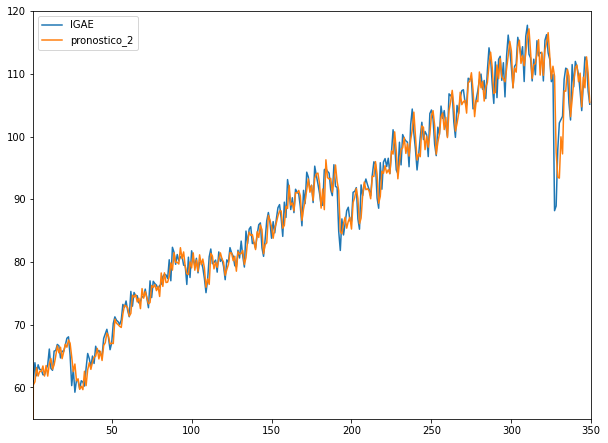

In [29]:
IGAE[['IGAE', 'pronostico_2']].plot()
plt.xlim([1,350])
plt.ylim([55,120])
plt.show()

### 15.- Seleccionamos el modelo 2 para predecir las posibles 5 observaciones siguientes

In [30]:
## vamos a pronosticar para 5 meses
resultado2.predict(350, 354)

350    107.441529
351    106.935869
352    110.116763
353    109.403732
354    107.766280
Name: predicted_mean, dtype: float64

### 16.- Por último, comenta que debilidades o limitaciones tienen los modelos ARIMA

Entre las limitaciones que detectamos son:

La primera se presenta cuando se intentan realizar
predicciones en el medio y largo plazo donde los intervalos de confianza de la predicción se incrementan de
manera considerable a partir del año y por tanto se pierde precisión en la predicción. 

Su carácter univariante que no permite hacer análisis explicativos sobre la evolución del precio ya que no es posible soportar
los resultados en ningún modelo económico. 

Es necesario tener una gran cantidad de datos y esto supondria un gasto mayor a la empresa o persona interesada 